In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import sys
sys.path.append('../predict_pclv_Stijn/')
import Nucleaseq_data_processing as process
import calculate_cleavage_rate as CLV
sys.path.append('../code_Boyle/')
import plotting_Boyle as plt_B
from copy import copy
import matplotlib.pylab as plt 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import dCas92Cas9 as Cas9
reload(Cas9);
import analysis_SA_fits as SAfits
reload(SAfits);
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);

In [46]:
data_folder = '../data/22_3_2019/'
clv_rate = 1000
Plot = True
Nparams = 43
model_id = 'general_energies_no_kPR'

In [14]:
simset = []
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,101):
    filename = data_folder + 'fit_22_3_2019_sim_' +str(sim) +'.txt' 
    sa = pd.read_csv(filename, delimiter='\t', index_col=45) 
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    

    
    
best_fit = simset[np.argmin(chi_squared)]
best_Boyle_param = plt_B.load_simm_anneal(best_fit, Nparams)
best_fit

'../data/22_3_2019/fit_22_3_2019_sim_13.txt'

In [12]:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset,percentage=0.1)

In [32]:
chi_squared_clv = []
corr_clv = []
score_clv = []

for filename in selected_sims:
    Boyle_param = plt_B.load_simm_anneal(filename, Nparams)
    chi_sq, c, s, _, _, _ = Cas9.predict_clv(Boyle_param, clv_rate, False)
    chi_squared_clv.append(chi_sq)
    corr_clv.append(c)
    score_clv.append(s)


In [42]:
best_chisq_clv = selected_sims[np.argmin(chi_squared_clv)]
best_score_clv = selected_sims[np.argmin(score_clv)]
best_corr_clv = selected_sims[np.argmax(corr_clv)]
best_score_clv == best_chisq_clv

True

### Best fit to Boyle

0.215961419141
333835.494864


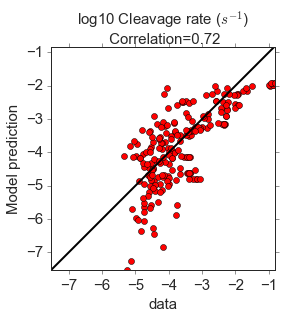

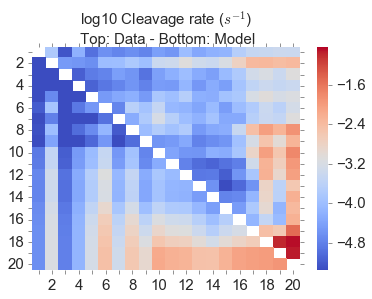

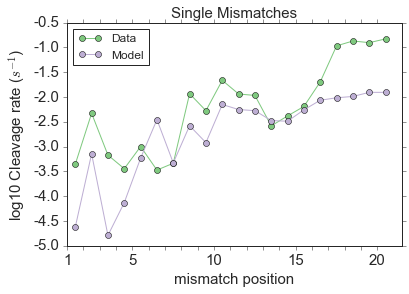

In [53]:
best_Boyle_param = plt_B.load_simm_anneal(best_fit, Nparams)
chi_square, corr, score, data, single_dat, double_mat = Cas9.predict_clv(best_Boyle_param, clv_rate, Plot)
print score
print chi_square

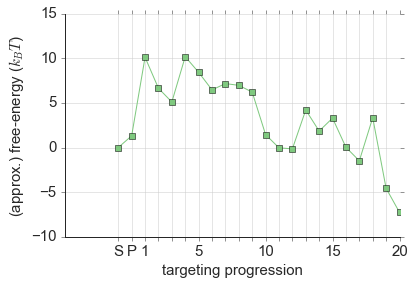

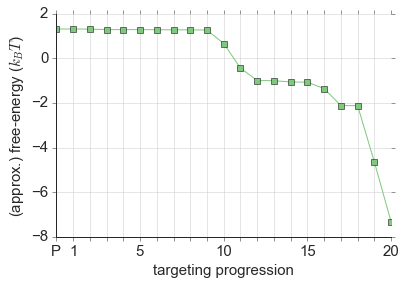

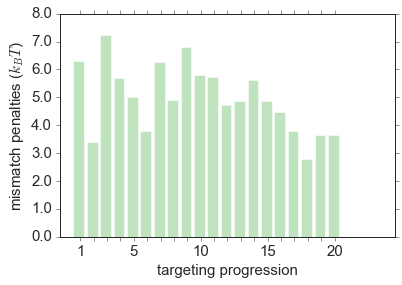

In [51]:
plt.figure()
_, _ = FreeEnergy.plot_free_energy_landscape(best_Boyle_param,model_id);

plt.figure()
_ = FreeEnergy.plot_mismatch_penalties(best_Boyle_param, model_id)

### Lowest Chi-square on Nucleaseq (best score)

0.190927039872


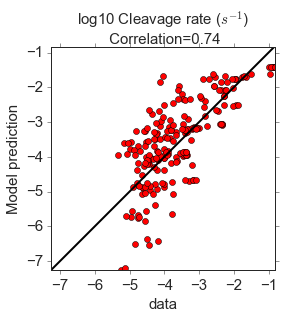

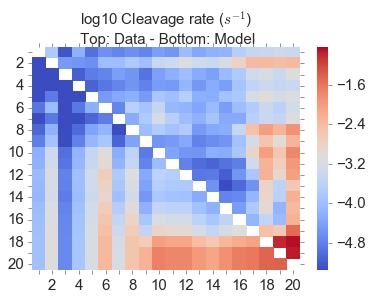

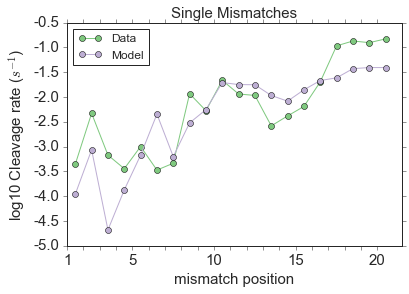

In [43]:
Boyle_param_clv = plt_B.load_simm_anneal(best_score_clv, Nparams)
chi_square, corr, score, data, single_dat, double_mat = Cas9.predict_clv(Boyle_param_clv, clv_rate, Plot)
print score

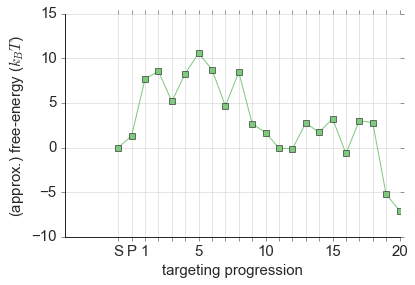

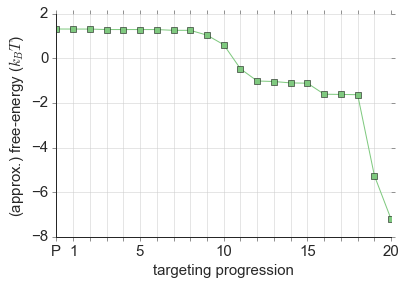

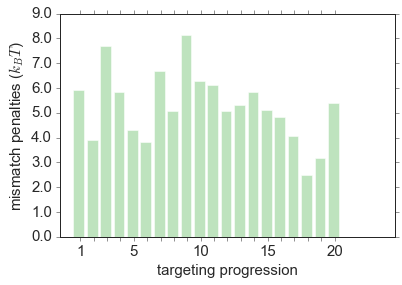

In [49]:
plt.figure()
_, _ = FreeEnergy.plot_free_energy_landscape(Boyle_param_clv,model_id);

plt.figure()
_ = FreeEnergy.plot_mismatch_penalties(Boyle_param_clv, model_id)


In [52]:
Boyle_param_clv

array([ 1.30953092, -6.38880258, -0.8548288 ,  3.38682333, -3.12368274,
       -2.2766299 ,  1.83879036,  4.07291358, -3.77499811,  5.7513977 ,
        1.01655652,  1.72166951,  0.093537  , -2.89615274,  1.04696944,
       -1.53309176,  3.89786222, -3.67660539,  0.22279668,  8.01559509,
        1.83384875,  5.92310404,  3.89496208,  7.70608243,  5.82937035,
        4.2923294 ,  3.80381685,  6.68447606,  5.05242179,  8.15643193,
        6.29889206,  6.10856033,  5.06083285,  5.29830827,  5.82620006,
        5.12297299,  4.84751712,  4.07623495,  2.49730663,  3.19552189,
        5.41509783, -2.27216512,  2.83136249])

### Best correlation with Nucleaseq (not so good of a measure)

0.228635708773


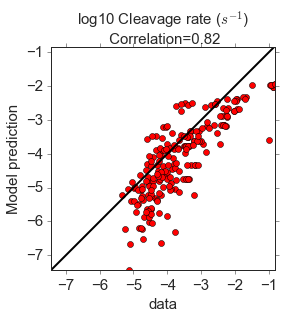

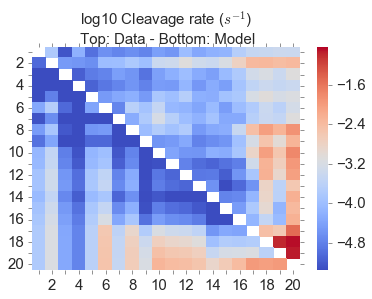

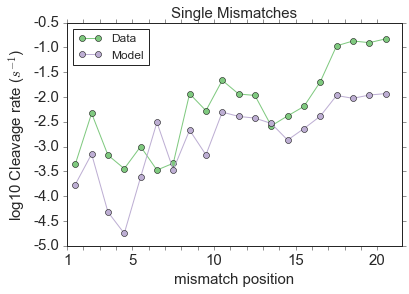

In [45]:
Boyle_param_clv_corr = plt_B.load_simm_anneal(best_corr_clv, Nparams)
chi_square, corr, score, data, single_dat, double_mat = Cas9.predict_clv(Boyle_param_clv_corr, clv_rate, Plot)
print score